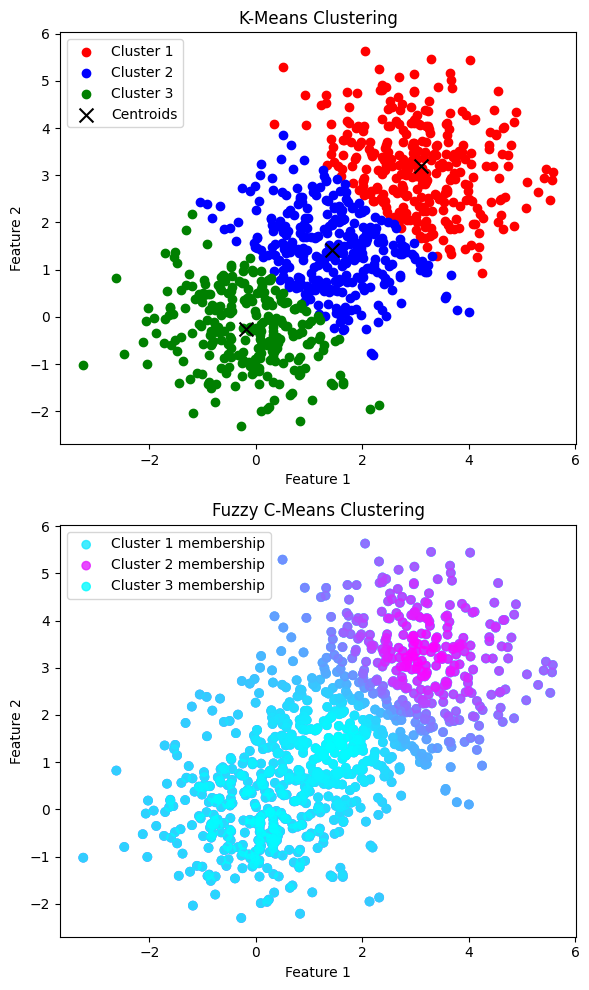

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skfuzzy as fuzz

# Step 1: Create a synthetic dataset
np.random.seed(42)
n_samples = 300

# Generate data for three clusters with slight overlap
cluster_1 = np.random.normal(0, 1, (n_samples, 2))
cluster_2 = np.random.normal(3, 1, (n_samples, 2))
cluster_3 = np.random.normal(1.5, 1, (n_samples, 2))

# Combine into a single dataset
data = np.vstack((cluster_1, cluster_2, cluster_3))

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Step 3: Apply Fuzzy C-Means Clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data.T, 3, 2, error=0.005, maxiter=1000)

# Define color map for clusters
colors = ['red', 'blue', 'green']

# Step 4: Visualization

# K-Means Plot
plt.figure(figsize=(6, 10))

plt.subplot(2, 1, 1)
for i in range(3):
    plt.scatter(data[kmeans_labels == i, 0], data[kmeans_labels == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Fuzzy C-Means Plot
plt.subplot(2, 1, 2)
for i in range(3):
    plt.scatter(data[:, 0], data[:, 1], c=u[i, :], cmap='cool', alpha=0.8, 
                label=f'Cluster {i+1} membership')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
